<a href="https://colab.research.google.com/github/Angeal13/Wellness_package/blob/main/22_Nov_Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

``Project- Tourism``

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages.
Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

``Objective``

To predict which customer is more likely to purchase the newly introduced travel package.

``Dataset Information``

*Tourims.xlsx*:Contains Customer Detaills
1. CustomerID: Unique customer ID
2. ProdTaken: Product taken flag
3.Age: Age of customer
4.TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
4.CityTier: City tier
5.Occupation: Occupation of customer
6.Gender: Gender of customer
7.NumberOfPersonVisited: Total number of person came with customer
8.PreferredPropertyStar: Preferred hotel property rating by customer
9.MaritalStatus: Marital status of customer
10.NumberOfTrips: Average number of the trip in a year by customer
11.Passport: The customer has passport or not
12.OwnCar: Customers owns a car flag
13.NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
14.Designation: Designation of the customer in the current organization
15.MonthlyIncome: Gross monthly income of the customer




#Load Libraries and Data

In [ ]:
!pip install xgboost 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Work Assignment /22_Nov/Tourism.xlsx')
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [ ]:
num_null=data.isnull().sum()
num_null

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

Age:Impute the mode

Typeofcontract:turn it into ordinale, and impute the mode

Duration of contract: Impute the mode

Number of Followups: Either 0 or Mode

PrefferPropertyStra:Mode or 0

Num_trips:Mode or 0

Num_children: 0

Income: Impute Mean

In [ ]:
precent_num_null=num_null*100/len(data)
precent_num_null

CustomerID                 0.000000
ProdTaken                  0.000000
Age                        4.623568
TypeofContact              0.511457
CityTier                   0.000000
DurationOfPitch            5.135025
Occupation                 0.000000
Gender                     0.000000
NumberOfPersonVisited      0.000000
NumberOfFollowups          0.920622
ProductPitched             0.000000
PreferredPropertyStar      0.531915
MaritalStatus              0.000000
NumberOfTrips              2.864157
Passport                   0.000000
PitchSatisfactionScore     0.000000
OwnCar                     0.000000
NumberOfChildrenVisited    1.350245
Designation                0.000000
MonthlyIncome              4.766776
dtype: float64

In [ ]:
sum(num_null)*100/len(data)

20.7037643207856

In [ ]:
data.shape

(4888, 20)

In [ ]:
data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

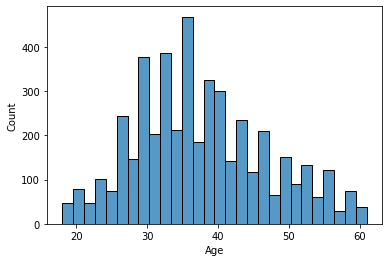

In [ ]:
sns.histplot(data['Age'])

In [ ]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
data['Age']=data['Age'].fillna(float(data['Age'].mode()))
data['DurationOfPitch']=data['DurationOfPitch'].fillna(9.0)
data['MonthlyIncome']=data['MonthlyIncome'].fillna(int(data['MonthlyIncome'].mean()))
data['NumberOfChildrenVisited']=data['NumberOfChildrenVisited'].fillna(0)
data['NumberOfTrips']=data['NumberOfTrips'].fillna(3)
data['NumberOfFollowups']=data['NumberOfFollowups'].fillna(0)
data['PreferredPropertyStar']=data['PreferredPropertyStar'].fillna(3)
data['TypeofContact']=data['TypeofContact'].fillna('Self Enquiry')

In [ ]:
for column in data.columns:
  if data[column].dtype=='float64':
    data[column]=pd.Int64Index(data[column])

data


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,35,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [ ]:
data=data.replace({'Gender':{'Fe Male':'F','Female':'F','Male':'M'}})
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,F,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,M,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,M,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,F,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,35,Self Enquiry,1,8,Small Business,M,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,M,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,M,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,F,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,M,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [ ]:
data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        2
NumberOfPersonVisited         5
NumberOfFollowups             7
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

In [ ]:
data.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [ ]:
features=[]
for feature in data.columns:
  if data[feature].dtype=='object':
    features.append(feature)
    data[feature]=pd.Categorical(data[feature])
data.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,F,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,M,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,M,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,F,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,35,Self Enquiry,1,8,Small Business,M,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468


# EDA of the Set

Make Boxplot:

1. ProductPitched vs Designation vs ProdTaken
2. Marital Status,Salary, ProdTaken
3. TypeofContact,Ocupation,ProdTaken

In [ ]:
data=data.drop('CustomerID',axis=1)

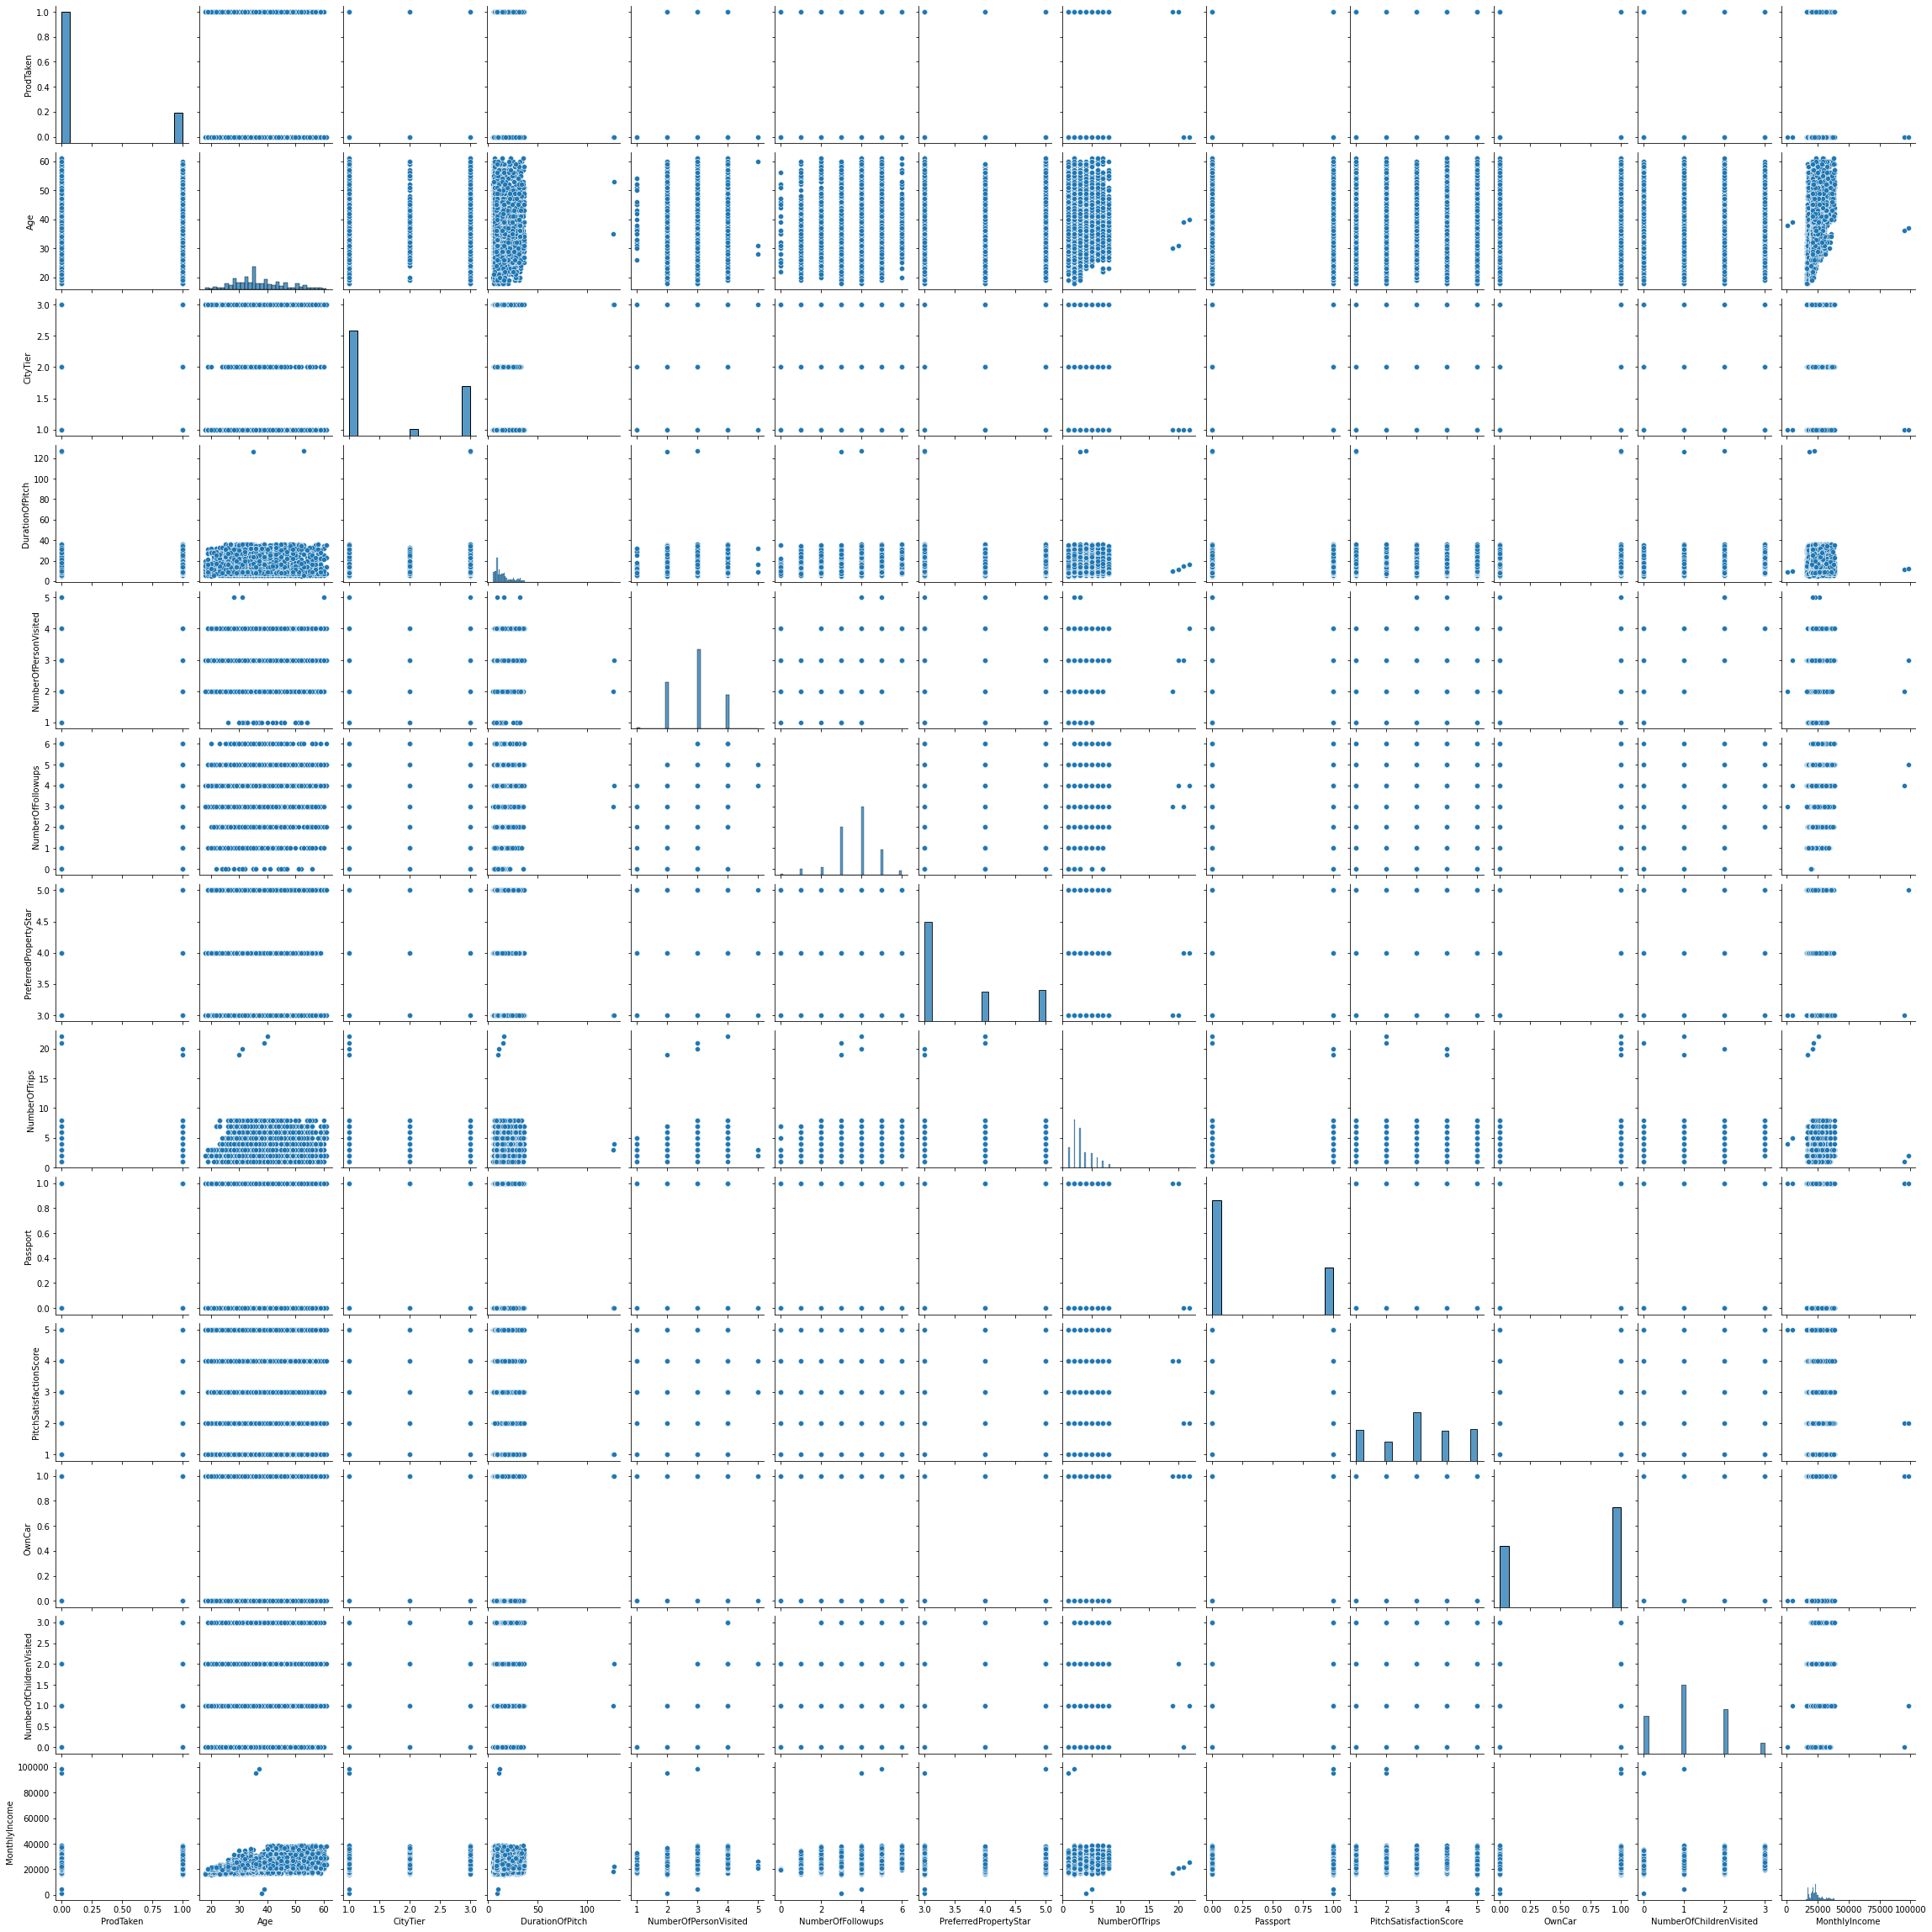

In [ ]:
#plt.figure(figsize=(len(data.columns),len(data.columns))
sns.pairplot(data)

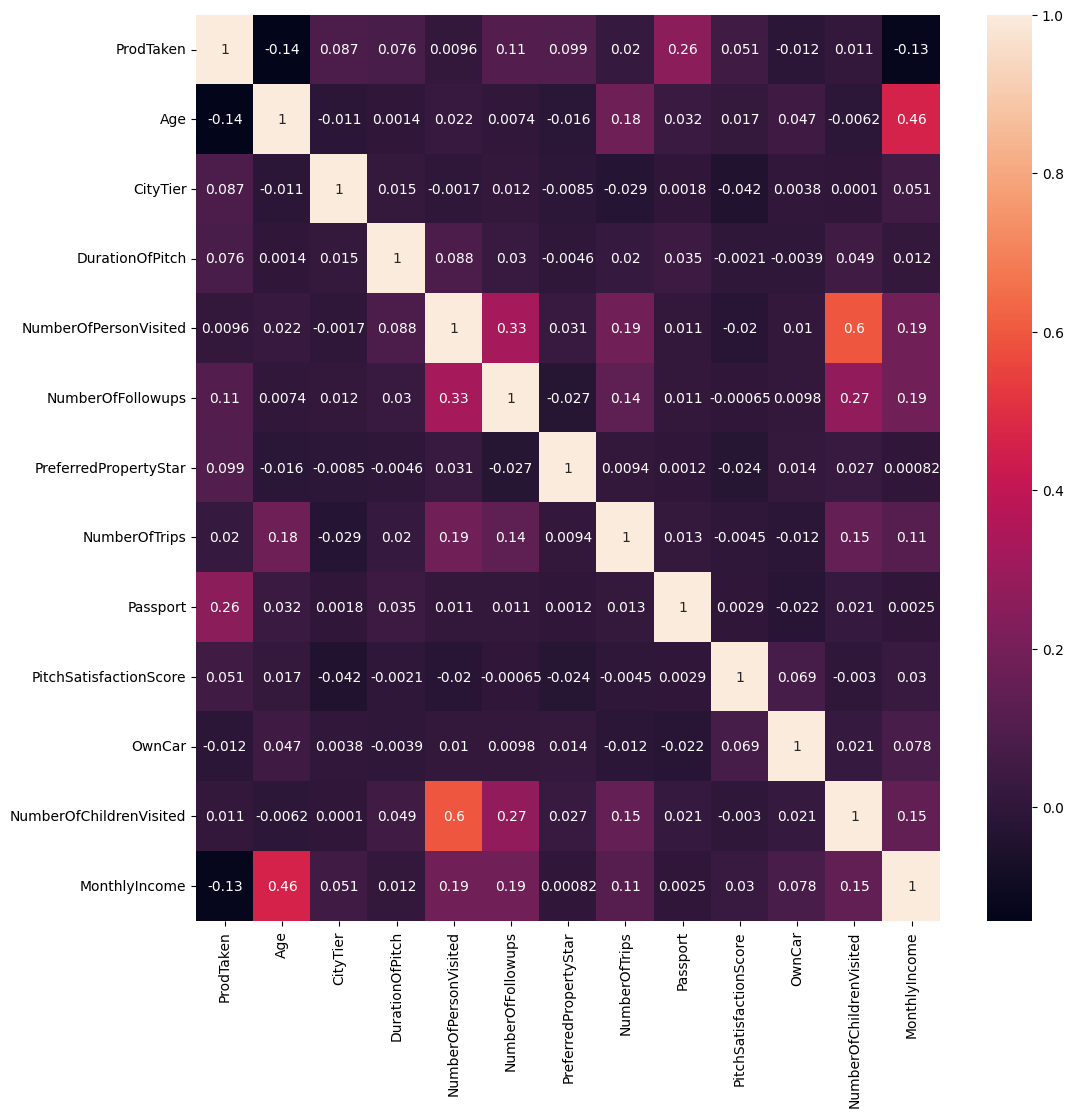

In [ ]:
corr=data.corr()
plt.figure(figsize=(12,12),dpi=100)
sns.heatmap(corr,annot=True)

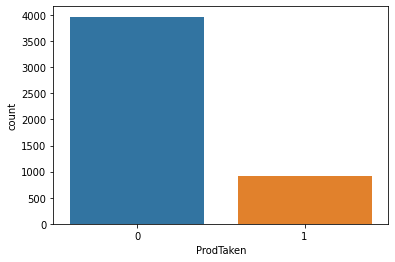

In [ ]:
sns.countplot(data['ProdTaken'])

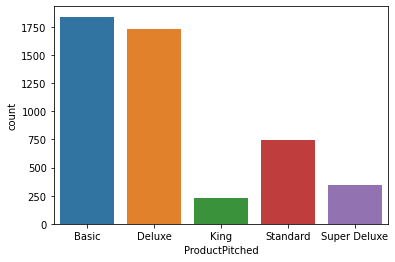

In [ ]:
sns.countplot(data['ProductPitched'])

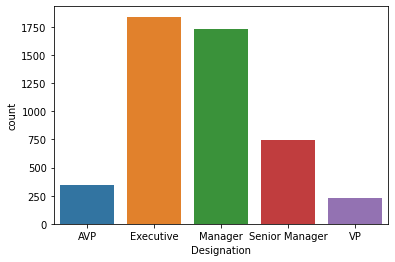

In [ ]:
sns.countplot(data['Designation'])

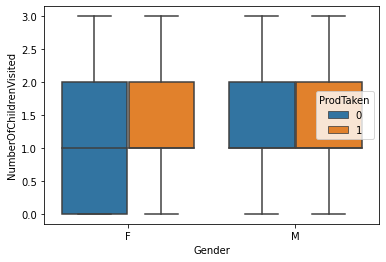

In [ ]:
sns.boxplot(x=data['Gender'],y=data['NumberOfChildrenVisited'],hue=data['ProdTaken'])

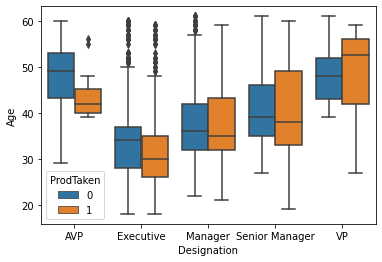

In [ ]:
sns.boxplot(x=data['Designation'],y=data['Age'],hue=data['ProdTaken'])

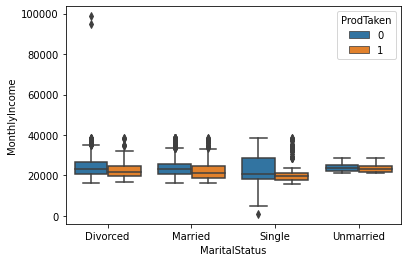

In [ ]:
sns.boxplot(x=data['MaritalStatus'],y=data['MonthlyIncome'],hue=data['ProdTaken'])

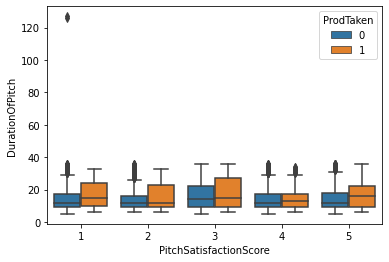

In [ ]:
sns.boxplot(x=data['PitchSatisfactionScore'],y=data['DurationOfPitch'],hue=data['ProdTaken'])

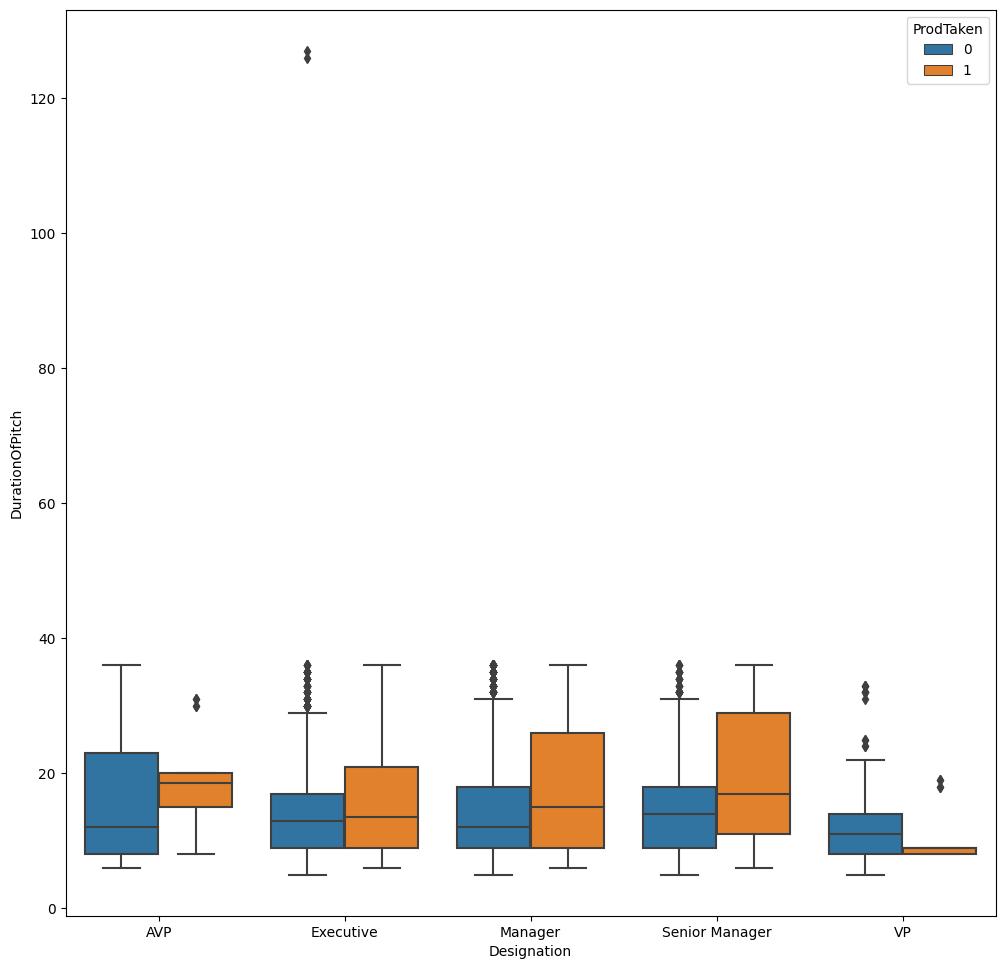

In [ ]:
plt.figure(figsize=(12,12),dpi=100)
sns.boxplot(x=data['Designation'],y=data['DurationOfPitch'],hue=data['ProdTaken'])

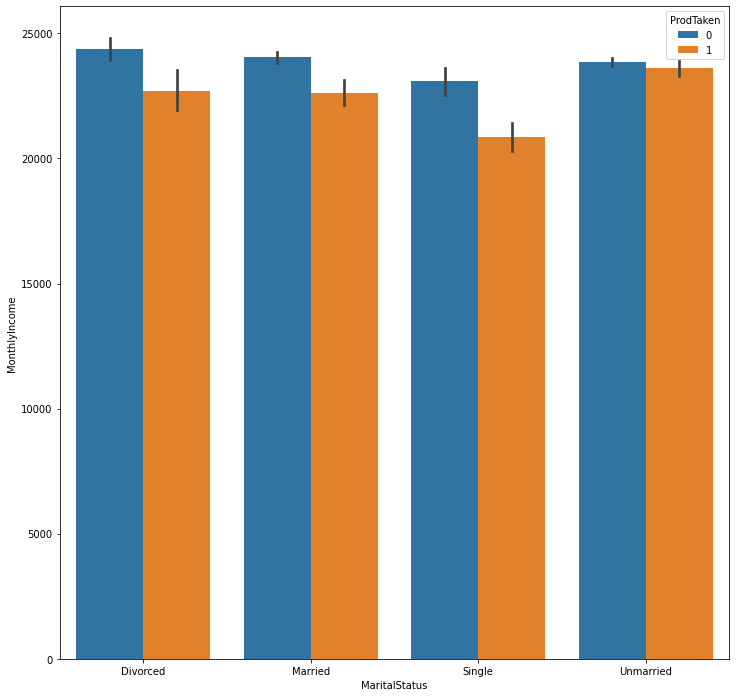

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x=data['MaritalStatus'],y=data['MonthlyIncome'],hue=data['ProdTaken'])

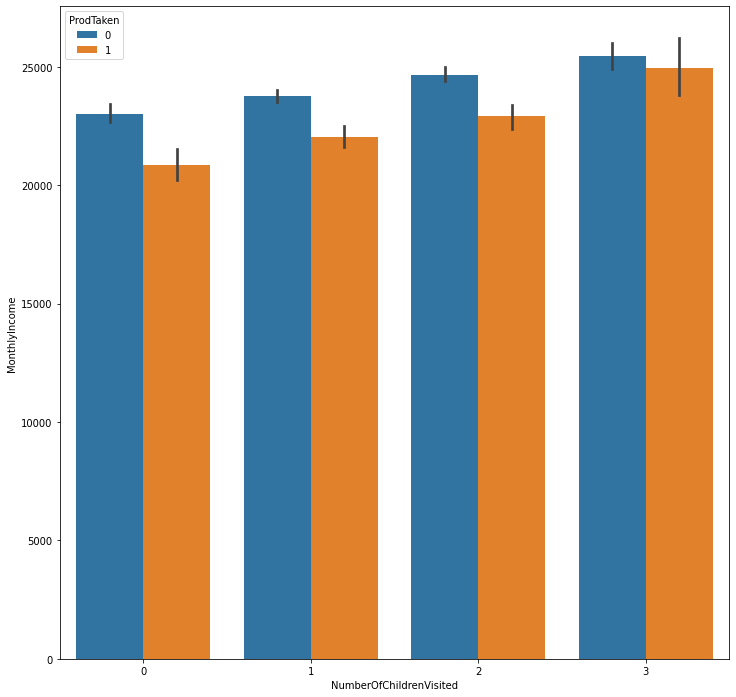

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x=data['NumberOfChildrenVisited'],y=data['MonthlyIncome'],hue=data['ProdTaken'])

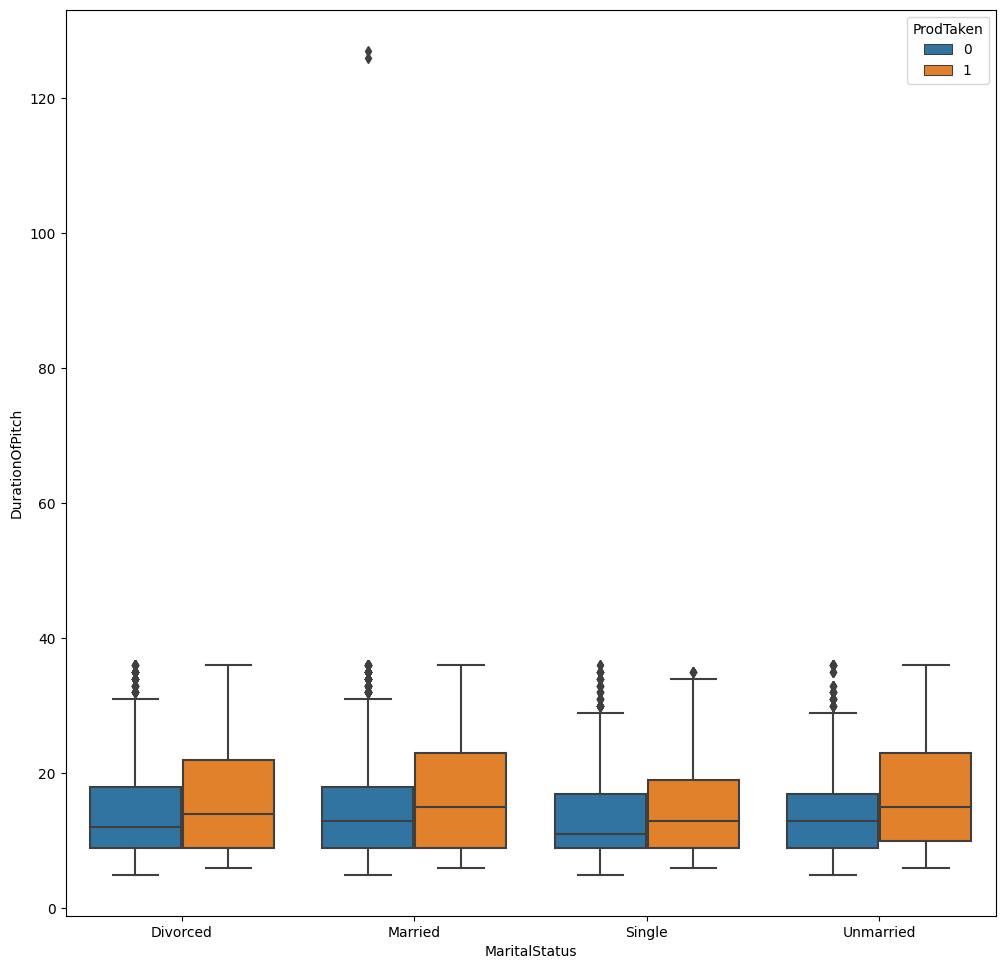

In [ ]:
plt.figure(figsize=(12,12),dpi=100)
sns.boxplot(x=data['MaritalStatus'],y=data['DurationOfPitch'],hue=data['ProdTaken'])

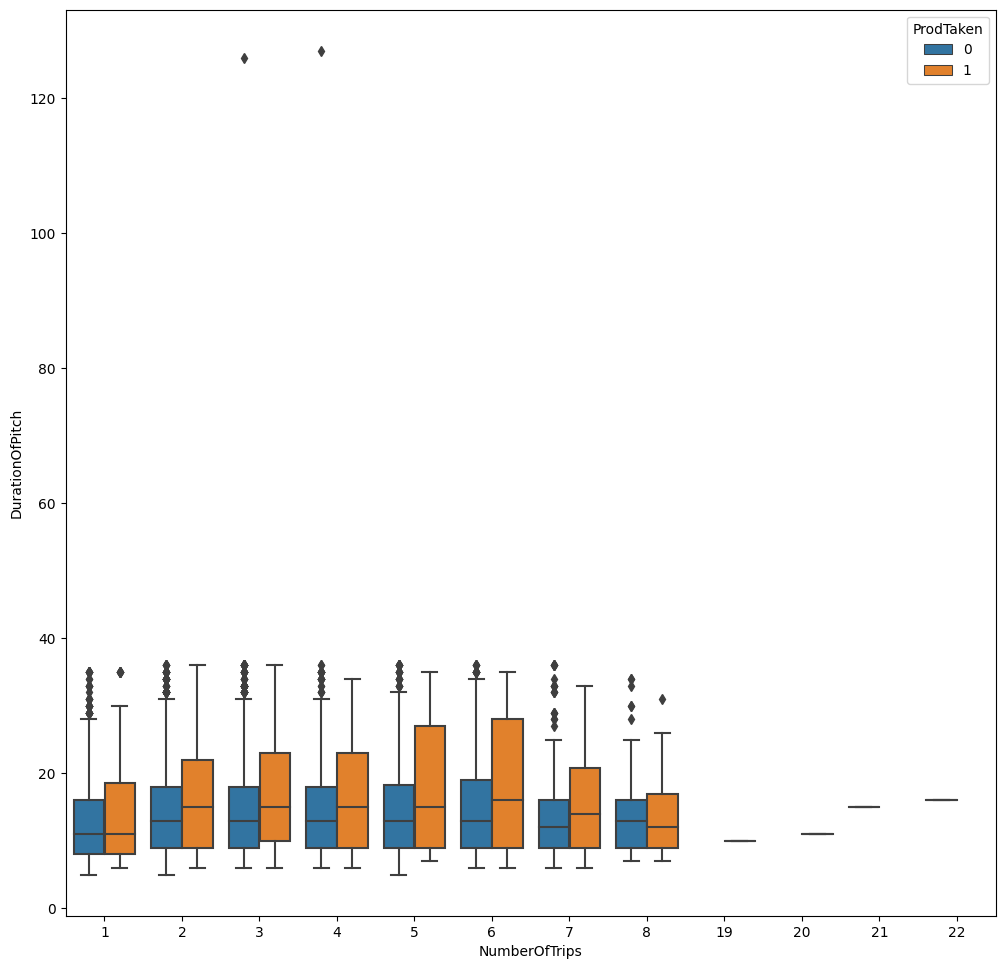

In [ ]:
plt.figure(figsize=(12,12),dpi=100)
sns.boxplot(x=data['NumberOfTrips'],y=data['DurationOfPitch'],hue=data['ProdTaken'])

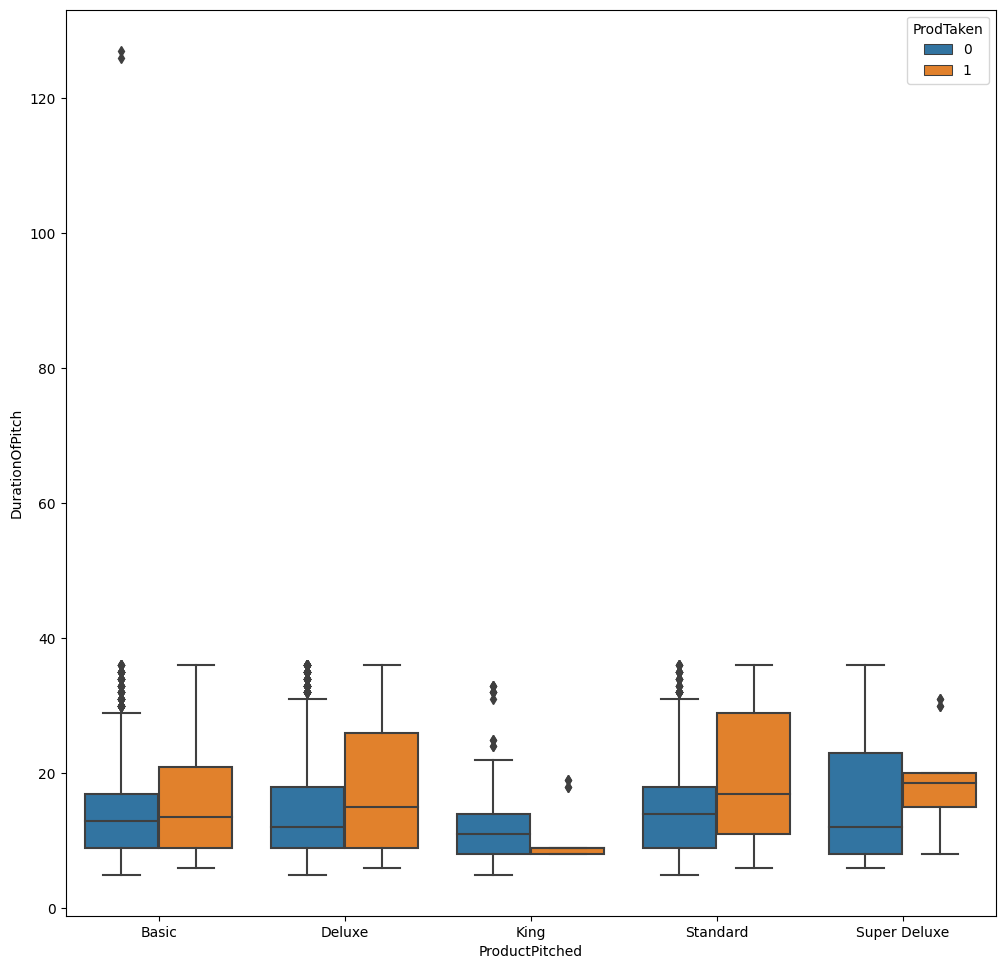

In [ ]:
plt.figure(figsize=(12,12),dpi=100)
sns.boxplot(x=data['ProductPitched'],y=data['DurationOfPitch'],hue=data['ProdTaken'])

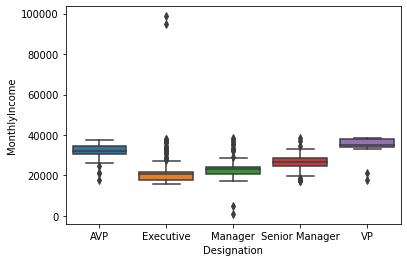

In [ ]:
sns.boxplot(x=data['Designation'],y=data['MonthlyIncome'])

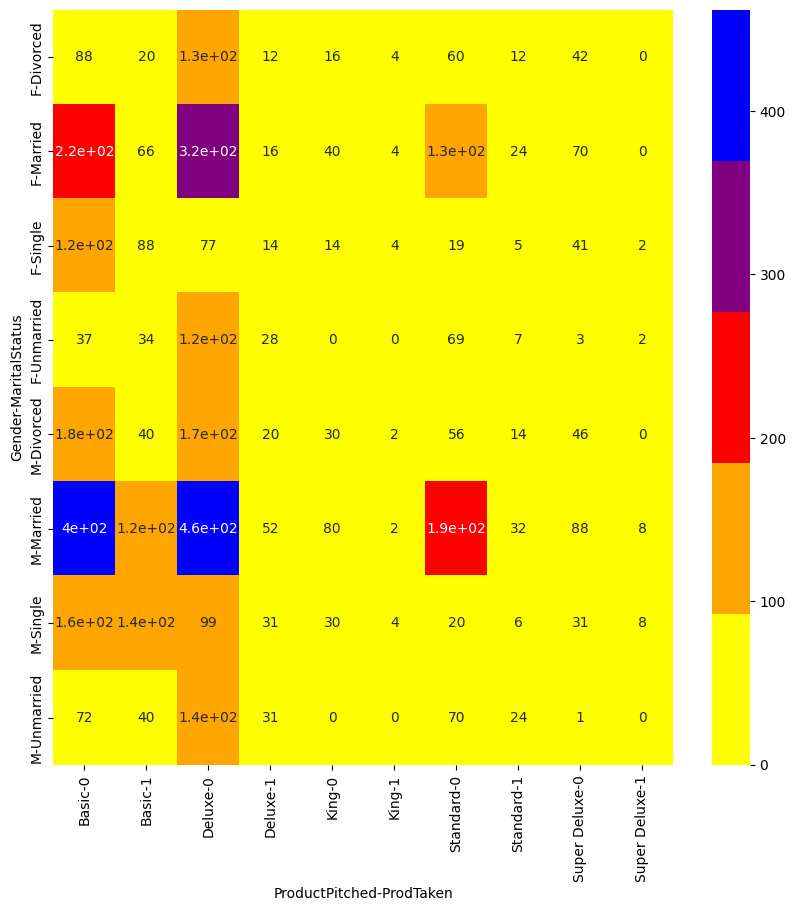

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(pd.crosstab(index=[data['Gender'],data['MaritalStatus']],columns=[data['ProductPitched'],data['ProdTaken']]),annot=True,cmap=['yellow','orange','red','purple','blue'])

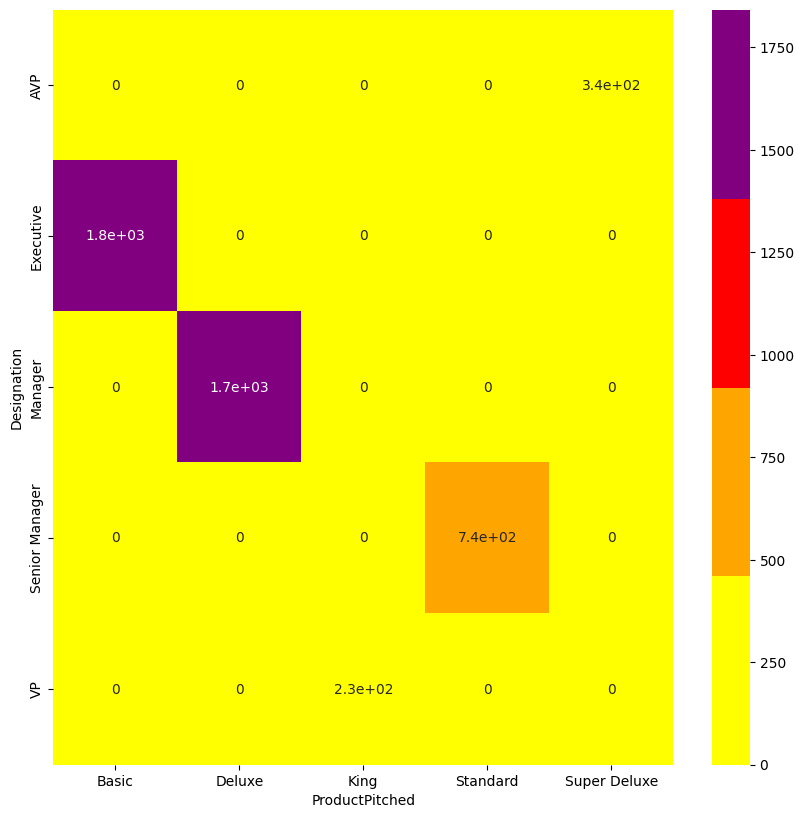

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(pd.crosstab(index=[data['Designation']],columns=[data['ProductPitched']]),annot=True,cmap=['yellow','orange','red','purple'])

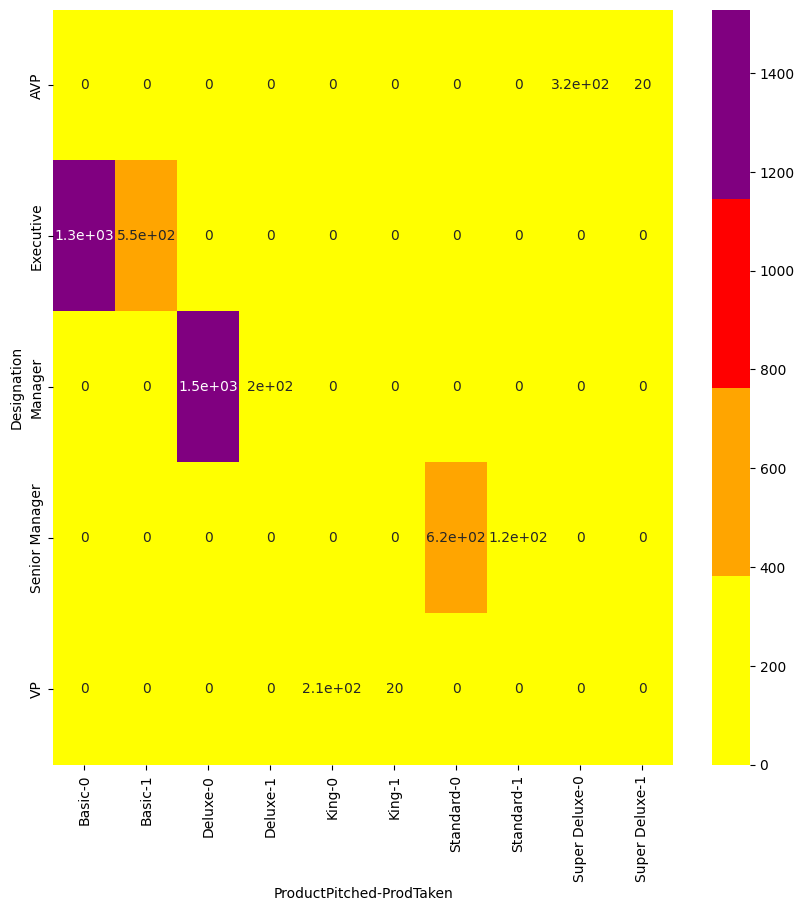

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(pd.crosstab(index=[data['Designation']],columns=[data['ProductPitched'],data['ProdTaken']]),annot=True,cmap=['yellow','orange','red','purple'])

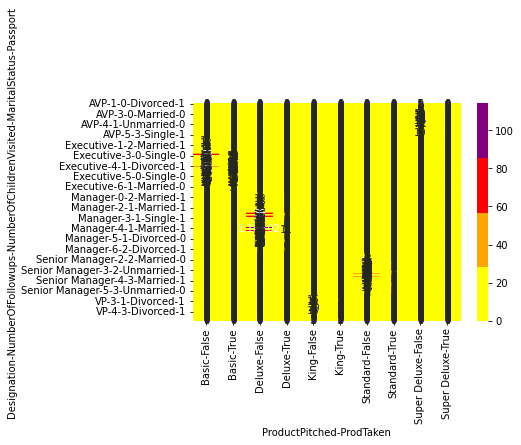

In [ ]:

sns.heatmap(pd.crosstab(index=[data['Designation'],data['NumberOfFollowups'],data['NumberOfChildrenVisited'],data['MaritalStatus'],data['Passport']],columns=[data['ProductPitched'],data['ProdTaken']==1]),annot=True,cmap=['yellow','orange','red','purple'])

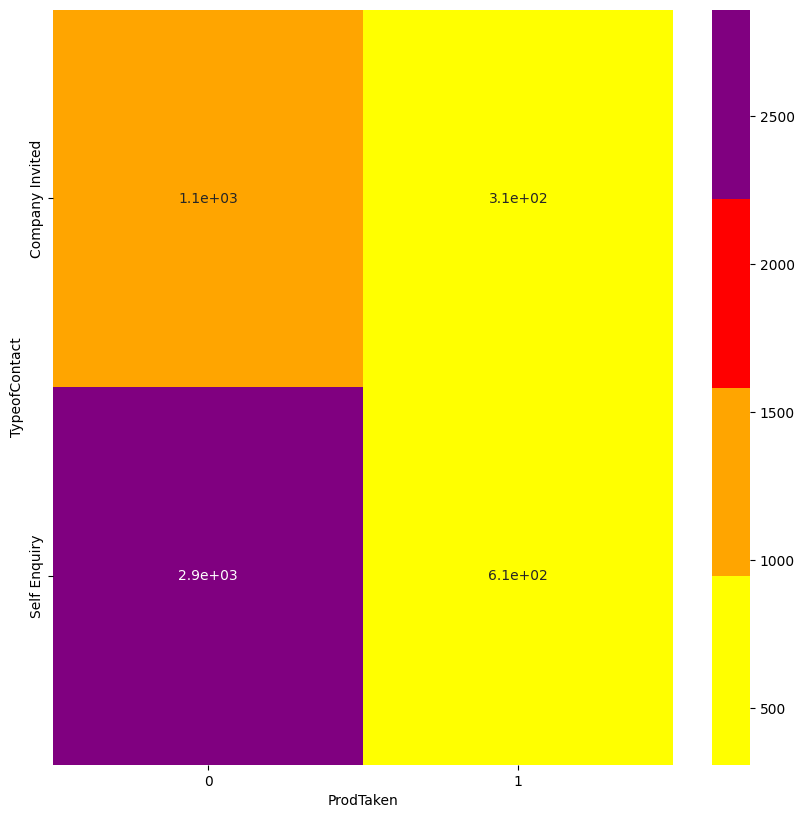

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(pd.crosstab(index=[data['TypeofContact']],columns=[data['ProdTaken']]),annot=True,cmap=['yellow','orange','red','purple'])

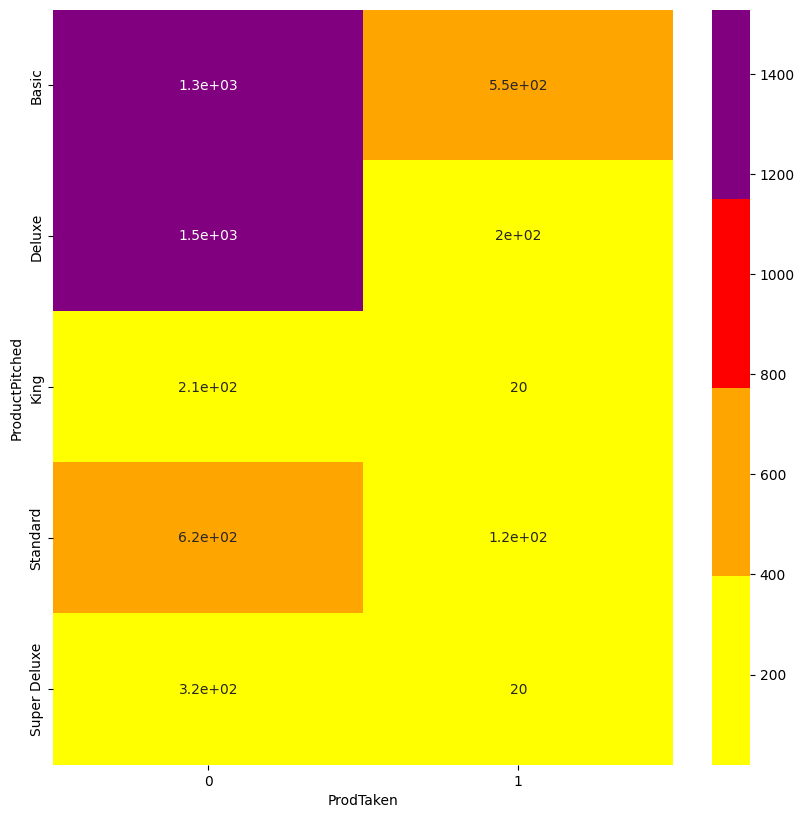

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(pd.crosstab(index=[data['ProductPitched']],columns=[data['ProdTaken']]),annot=True,cmap=['yellow','orange','red','purple'])

In [ ]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
features
for i in features:
  print(data[i].value_counts())

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
M    2916
F    1972
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


# Get the Data ready for Models


In [ ]:
features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [ ]:
replacements={
    'TypeofContact':{'Self Enquiry':0,'Company Invited':1},
    'Occupation':{'Salaried':0,'Small Business':1,'Large Business':2,'Free Lancer':3},
    'ProductPitched':{'Basic':0,'Standard':1,'Deluxe':2,'Super Deluxe':3,'King':4},
    'MaritalStatus':{'Single':0,'Unmarried':1,'Married':2,'Divorced':3},
     'Designation':{'Executive':4,'Manager':1,'Senior Manager':2,'AVP':0,'VP':3},
     'Gender':{'F':0,'M':1}
}

In [ ]:
data['Gender'].value_counts()
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41,Self Enquiry,3,6,Salaried,F,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,0,49,Company Invited,1,14,Salaried,M,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,1,37,Self Enquiry,1,8,Free Lancer,M,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,0,33,Company Invited,1,9,Salaried,F,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,0,35,Self Enquiry,1,8,Small Business,M,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49,Self Enquiry,3,9,Small Business,M,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,1,28,Company Invited,1,31,Salaried,M,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,1,52,Self Enquiry,3,17,Salaried,F,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,1,19,Self Enquiry,3,16,Small Business,M,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [ ]:
data_mod=data.copy()

In [ ]:
data_mod=data_mod.replace(replacements)
data_mod=pd.get_dummies(data_mod,columns=features)
data_mod.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome,TypeofContact_0,TypeofContact_1,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Gender_0,Gender_1,ProductPitched_0,ProductPitched_1,ProductPitched_2,ProductPitched_3,ProductPitched_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,Designation_0,Designation_1,Designation_2,Designation_3,Designation_4
0,1,41,3,6,3,3,3,1,1,2,1,0,20993,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,0,49,1,14,3,4,4,2,0,3,1,2,20130,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,37,1,8,3,4,3,7,1,3,0,0,17090,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,33,1,9,2,3,3,2,1,5,1,1,17909,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,35,1,8,2,3,4,1,0,5,1,0,18468,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5,0,32,1,8,3,3,3,1,0,5,1,1,18068,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
6,0,59,1,9,2,2,5,5,1,2,1,1,17670,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
7,0,30,1,30,3,3,3,2,0,2,0,1,17693,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
8,0,38,1,29,2,4,3,1,0,3,0,0,24526,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
9,0,36,1,33,3,3,3,7,0,3,1,0,20237,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
X=data_mod.drop('ProdTaken',axis=1)
y=data_mod['ProdTaken']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

#Make Models:
Create several models with the given data sets.
It is important to understand that we are looking for the highest score in precision.

##Regular Models

###Model 1 Bagging Clasifier

In [ ]:
model_1=BaggingClassifier(random_state=1)
model_1.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:
model_1_metrics=get_metrics_score(model=model_1)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9086571233810498
Recall on training set :  0.9720496894409938
Recall on test set :  0.6159420289855072
Precision on training set :  0.9984051036682615
Precision on test set :  0.8585858585858586


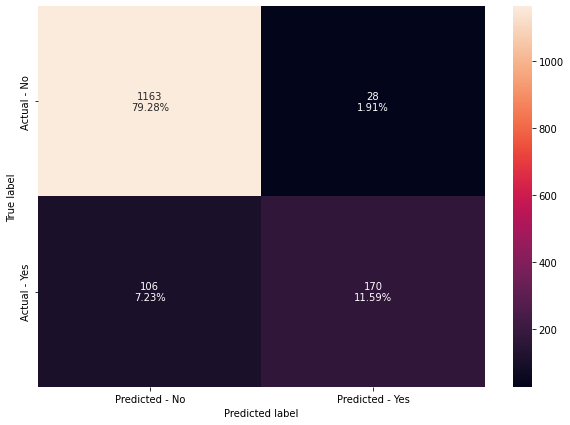

In [ ]:
model_1_cm=make_confusion_matrix(model_1,y_test)

###Model 2:Random Forest Tree 

In [ ]:
model_2=RandomForestClassifier(random_state=1)
model_2.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
model_2_scores=get_metrics_score(model_2)

Accuracy on training set :  1.0
Accuracy on test set :  0.9100204498977505
Recall on training set :  1.0
Recall on test set :  0.5615942028985508
Precision on training set :  1.0
Precision on test set :  0.9337349397590361


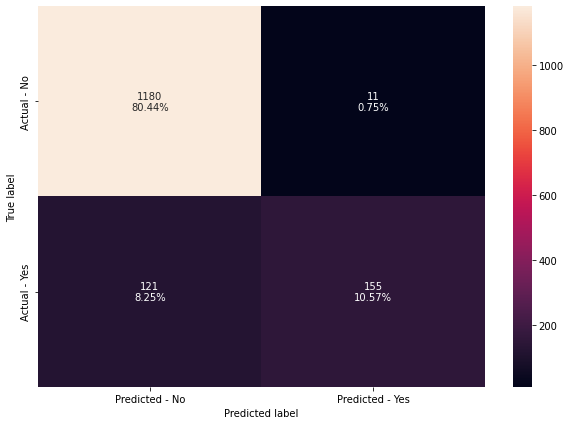

In [ ]:
model_2_cm=make_confusion_matrix(model_2,y_test)

###Model_3 AdaBoost

In [ ]:
model_3=AdaBoostClassifier(random_state=1)
model_3.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
model_3_scores=get_metrics_score(model_3)

Accuracy on training set :  0.84536685179772
Accuracy on test set :  0.8493524199045671
Recall on training set :  0.31521739130434784
Recall on test set :  0.3333333333333333
Precision on training set :  0.697594501718213
Precision on test set :  0.7131782945736435


###Model 4 Gradient Boost

In [ ]:
model_4=GradientBoostingClassifier(random_state=1)
model_4.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
model_4_score=get_metrics_score(model_4)

Accuracy on training set :  0.8859982461268635
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.44875776397515527
Recall on test set :  0.391304347826087
Precision on training set :  0.8919753086419753
Precision on test set :  0.7883211678832117


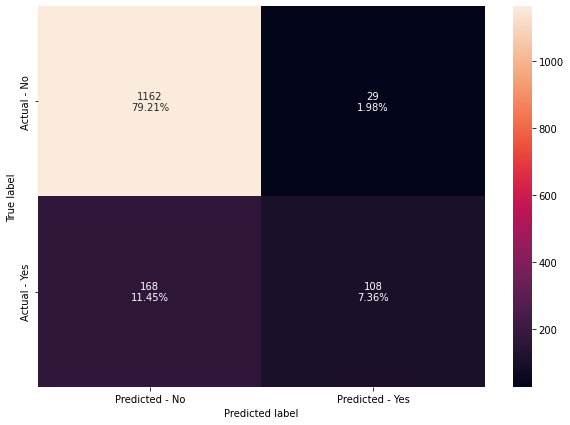

In [ ]:
model_4_cm=make_confusion_matrix(model_4,y_test)

###Model 5 XG Boost

In [ ]:
model_5=XGBClassifier(random_state=1)
model_5.fit(X_train,y_train)

XGBClassifier(random_state=1)

In [ ]:
model_5_score=get_metrics_score(model_5)

Accuracy on training set :  0.8789827535808243
Accuracy on test set :  0.8595773687798227
Recall on training set :  0.4161490683229814
Recall on test set :  0.3333333333333333
Precision on training set :  0.8758169934640523
Precision on test set :  0.8070175438596491


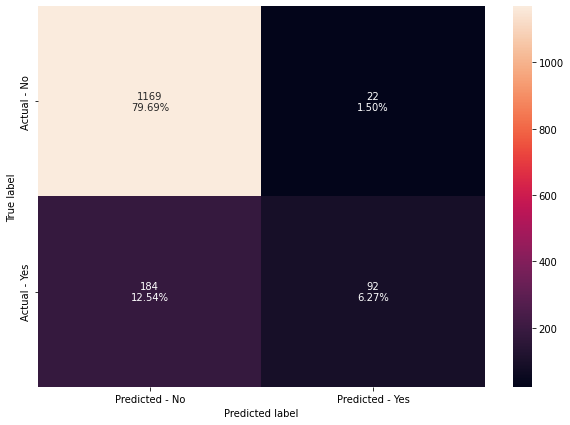

In [ ]:
model_5_cm=make_confusion_matrix(model_5,y_test)

##Fine Tunned Models

###Model 1 Bagging Tunned

In [ ]:
model_1_tunned=BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
acc_scorer=metrics.make_scorer(metrics.precision_score)

grid_obj = GridSearchCV(model_1_tunned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

model_1_tunned=grid_obj.best_estimator_

model_1_tunned.fit(X_train,y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [ ]:
model_1_tunned_metric=get_metrics_score(model_1_tunned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9120654396728016
Recall on training set :  0.9984472049689441
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.9401197604790419


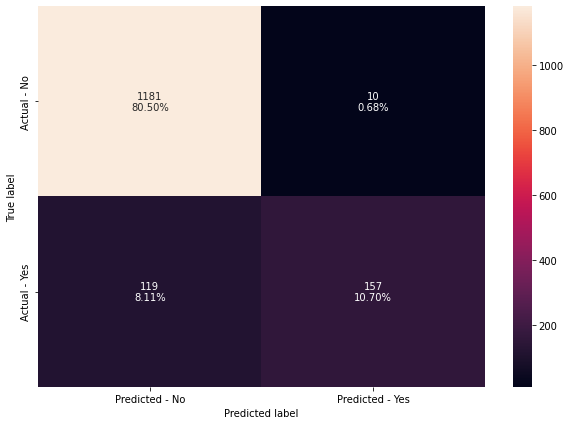

In [ ]:
model_1_tunned_cm=make_confusion_matrix(model_1_tunned,y_test)

###Model 2 Tunned: Random Forest Tree Tunned

In [ ]:
model_2_tunned=RandomForestClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer=metrics.make_scorer(metrics.precision_score)

grid_obj=GridSearchCV(model_2_tunned,parameters,scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train,y_train)

model_2_tunned=grid_obj.best_estimator_

model_2_tunned.fit(X_train,y_train)

RandomForestClassifier(max_features=1, max_samples=0.8, n_estimators=50,
                       random_state=1)

In [ ]:
model_2_tunned_scores=get_metrics_score(model_2_tunned)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.8793456032719836
Recall on training set :  0.9953416149068323
Recall on test set :  0.37681159420289856
Precision on training set :  1.0
Precision on test set :  0.9541284403669725


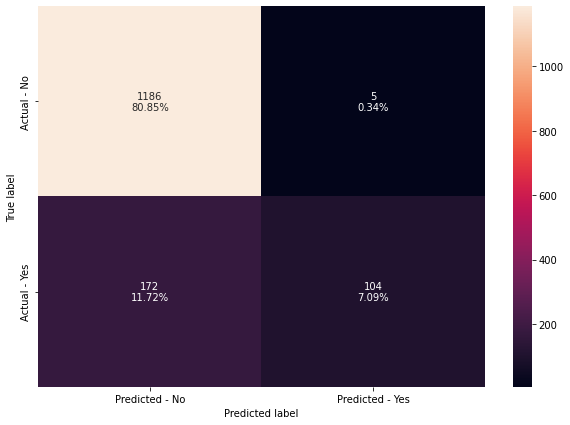

In [ ]:
model_2_tunned_cm=make_confusion_matrix(model_2_tunned,y_test)

###Model 3 Tunned:AdaBoost Fine Tunned

In [ ]:
model_3_tunned=AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
acc_scorer=metrics.make_scorer(metrics.precision_score)

grid_obj=GridSearchCV(model_3_tunned,parameters,scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train,y_train)

model_3_tunned=grid_obj.best_estimator_

model_3_tunned.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=60, random_state=1)

In [ ]:
model_3_tunned_scores=get_metrics_score(model_3_tunned)

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8166325835037491
Recall on training set :  0.05745341614906832
Recall on test set :  0.036231884057971016
Precision on training set :  0.9024390243902439
Precision on test set :  0.7692307692307693


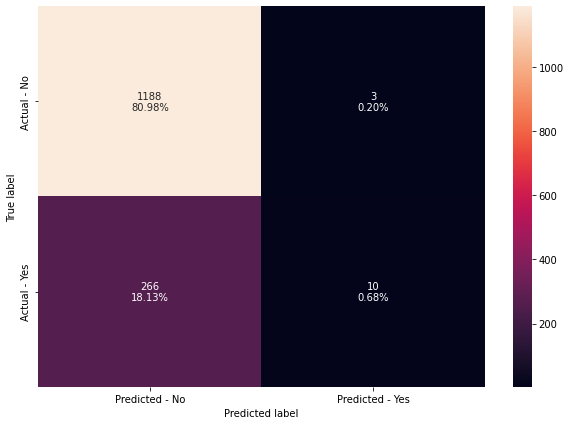

In [ ]:
model_3_tunned_cm=make_confusion_matrix(model_3_tunned,y_test)

###Model 4 Tunned: Gradient Boost Tunned

In [ ]:
model_4_tunned=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer=metrics.make_scorer(metrics.precision_score)

grid_obj=GridSearchCV(model_4_tunned,parameters,scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train,y_train)

model_4_tunned=grid_obj.best_estimator_

model_3_tunned.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=60, random_state=1)

In [ ]:
model_4_tunned_scores=get_metrics_score(model_4_tunned)

Accuracy on training set :  0.8468284127448115
Accuracy on test set :  0.8370824812542604
Recall on training set :  0.21583850931677018
Recall on test set :  0.17028985507246377
Precision on training set :  0.879746835443038
Precision on test set :  0.8245614035087719


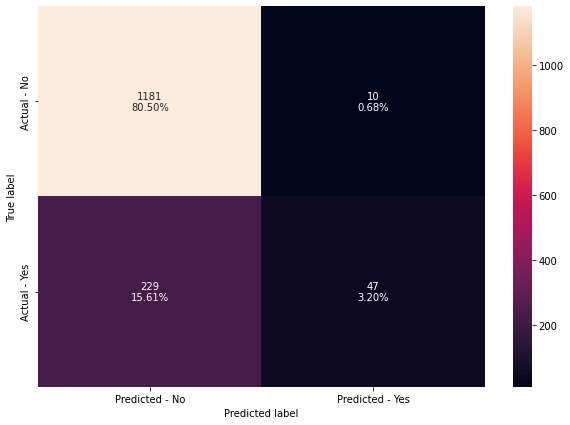

In [ ]:
model_4_tunned_cm=make_confusion_matrix(model_4_tunned,y_test)

###Model 5 Tunned: XGBoost Tunned

In [ ]:
model_5_tunned=XGBClassifier(random_state=1)

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

acc_scorer=metrics.make_scorer(metrics.precision_score)

grid_obj=GridSearchCV(model_5_tunned,parameters,scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train,y_train)

model_5_tunned=grid_obj.best_estimator_

model_5_tunned.fit(X_train,y_train)

In [ ]:
model_5_tunned_score=get_metrics_score(model_5_tunned)

In [ ]:
model_5_tunned_cm=make_confusion_matrix(model_5_tunned,y_train)

## Fine Tunned. Recall

###Model 1 Tunned: Bagging Tunning For Recall

In [ ]:
model_1_recall_tunned=BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
acc_scorer=metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(model_1_recall_tunned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

model_1_recall_tunned=grid_obj.best_estimator_

model_1_recall_tunned.fit(X_train,y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
model_1_recall_tunned_scores=get_metrics_score(model_1_recall_tunned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9216087252897068
Recall on training set :  0.9984472049689441
Recall on test set :  0.6340579710144928
Precision on training set :  1.0
Precision on test set :  0.9259259259259259


In [ ]:
model_1_metrics,model_1_tunned_metric,model_1_recall_tunned_scores

([0.9944460684010523,
  0.9086571233810498,
  0.9720496894409938,
  0.6159420289855072,
  0.9984051036682615,
  0.8585858585858586],
 [0.9997076878105817,
  0.9120654396728016,
  0.9984472049689441,
  0.5688405797101449,
  1.0,
  0.9401197604790419],
 [0.9997076878105817,
  0.9216087252897068,
  0.9984472049689441,
  0.6340579710144928,
  1.0,
  0.9259259259259259])

###Model 2 Recall Tunned: Random Forest Tunned

In [ ]:
model_2_recall_tunned=RandomForestClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer=metrics.make_scorer(metrics.recall_score)

grid_obj=GridSearchCV(model_2_tunned,parameters,scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train,y_train)

model_2_recall_tunned=grid_obj.best_estimator_

model_2_recall_tunned.fit(X_train,y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                       random_state=1)

In [ ]:
model_2_recall_metrics=get_metrics_score(model_2_recall_tunned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9338786639400136
Recall on training set :  0.9968944099378882
Recall on test set :  0.7028985507246377
Precision on training set :  1.0
Precision on test set :  0.9282296650717703


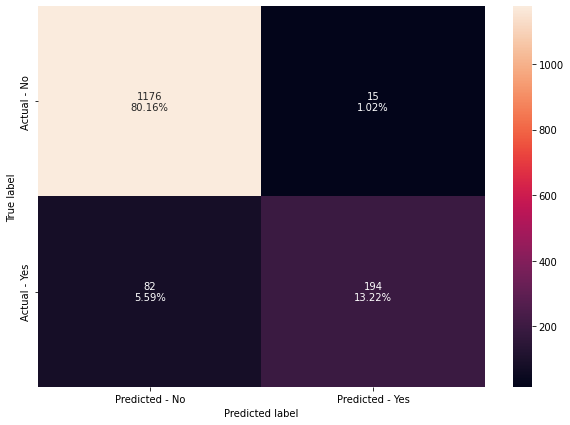

In [ ]:
model_2_recall_tunned_cm=make_confusion_matrix(model_2_recall_tunned,y_test)

###Model 3 Recall Tunned: AdaBoost Recall Tunned

In [ ]:
model_3_recall_tunned=AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
acc_scorer=metrics.make_scorer(metrics.recall_score)

grid_obj=GridSearchCV(model_3_tunned,parameters,scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train,y_train)

model_3_recall_tunned=grid_obj.best_estimator_

model_3_recall_tunned.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

In [ ]:
model_3_recall_metrics=get_metrics_score(model_3_recall_tunned)

Accuracy on training set :  0.9883075124232681
Accuracy on test set :  0.8888888888888888
Recall on training set :  0.9456521739130435
Recall on test set :  0.6340579710144928
Precision on training set :  0.99185667752443
Precision on test set :  0.7383966244725738


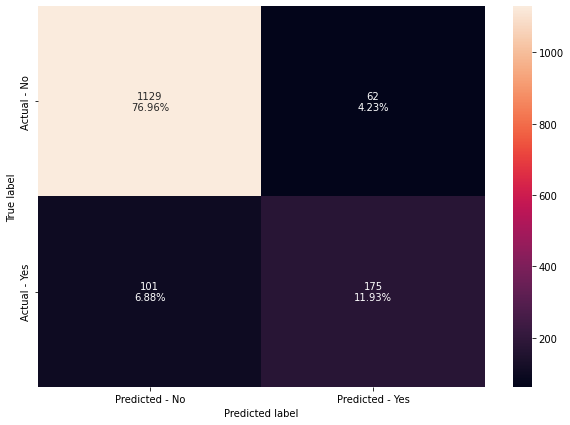

In [ ]:
model_3_recall_tunned_cm=make_confusion_matrix(model_3_recall_tunned,y_test)

###Model 4 Recall Tunned: Gradient Boosting Recall

In [ ]:
model_4_recall_tunned=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer=metrics.make_scorer(metrics.recall_score)

grid_obj=GridSearchCV(model_4_tunned,parameters,scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train,y_train)

model_4_recall_tunned=grid_obj.best_estimator_

model_3_recall_tunned.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

In [ ]:
model_4_recall_tunned_metrics=get_metrics_score(model_4_recall_tunned)

Accuracy on training set :  0.9245834551300789
Accuracy on test set :  0.8786639400136332
Recall on training set :  0.6366459627329193
Recall on test set :  0.48188405797101447
Precision on training set :  0.9447004608294931
Precision on test set :  0.7916666666666666


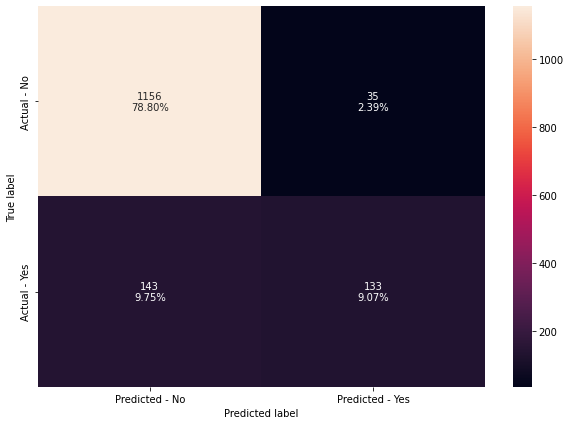

In [ ]:
model_4_recall_tunned_cm=make_confusion_matrix(model_4_recall_tunned,y_test)

#Comparing All Models

In [ ]:
# defining list of models
models = [model_1,model_1_tunned,model_1_recall_tunned,model_2,model_2_tunned,model_2_recall_tunned,model_3,model_3_tunned,model_3_recall_tunned,model_4,model_4_tunned,model_4_recall_tunned,model_5]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame=pd.DataFrame({'Model':['model_1','model_1_tunned','model_1_recall_tunned',
                                        'model_2','model_2_tunned','model_2_recall_tunned',
                                        'model_3','model_3_tunned','model_3_recall_tunned',
                                        'model_4','model_4_tunned','model_4_recall_tunned',
                                        'model_5'],
                               'Model_Type':models,
                               'Test_Accuracy':acc_test,
                               'Test_Recall':recall_test,
                               'Test_Precision':precision_test})

In [ ]:
comparison_frame

,Model,Model_Type,Test_Accuracy,Test_Recall,Test_Precision
0,model_1,(DecisionTreeClassifier(random_state=102886208...,0.91,0.62,0.86
1,model_1_tunned,(DecisionTreeClassifier(random_state=102886208...,0.91,0.57,0.94
2,model_1_recall_tunned,(DecisionTreeClassifier(random_state=102886208...,0.92,0.63,0.93
3,model_2,"(DecisionTreeClassifier(max_features='auto', r...",0.91,0.56,0.93
4,model_2_tunned,"(DecisionTreeClassifier(max_features=1, random...",0.88,0.38,0.95
5,model_2_recall_tunned,"(DecisionTreeClassifier(max_features=0.8, rand...",0.93,0.70,0.93
6,model_3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.85,0.33,0.71
7,model_3_tunned,"(DecisionTreeClassifier(max_depth=1, random_st...",0.82,0.04,0.77
8,model_3_recall_tunned,"(DecisionTreeClassifier(max_depth=3, random_st...",0.89,0.63,0.74
9,model_4,([DecisionTreeRegressor(criterion='friedman_ms...,0.87,0.39,0.79


Given that the project is 2 staged:

1. Lookin for the model with the precision for stage 1-`model_2_tunned`. To Target the most loyal customers to see if they like the product

2. Looking th emodel with the highest recall to try to target possible new customers after the loyal ones have liked the products. `model_2_recall_tunned` for my case

#Feature Importance

In [ ]:
def get_feature_importance(model,X):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = list(X.columns)

  plt.figure(figsize=(12,12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

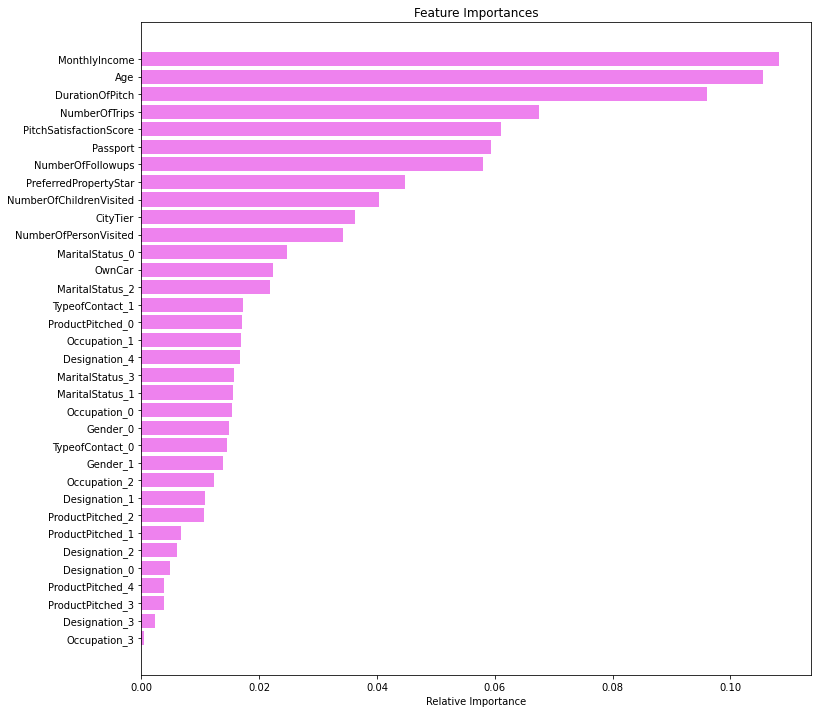

In [ ]:
stage_1_feature_importance=get_feature_importance(model_2_tunned,X)

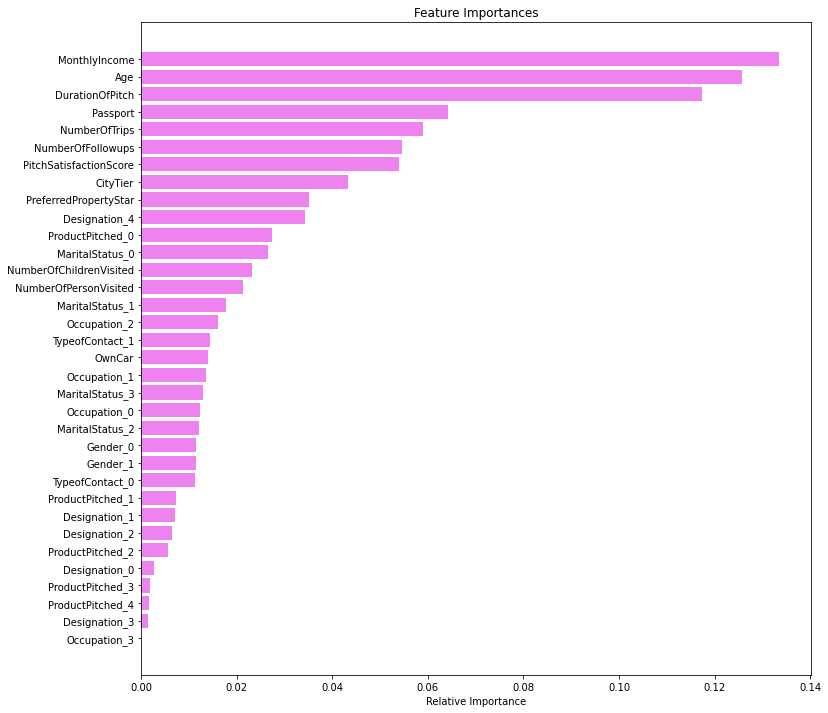

In [ ]:
stage_2_feature_importance=get_feature_importance(model_2_recall_tunned,X)